# Loan Application Status Prediction

# Introduction

In this project, we aim to predict the loan application status of applicants based on various features such as gender, marital status of applicantsetc. The dataset inculdes details of applicants who have applied for a loan amd tak is to build machine learning model that can predict whether a loan will be approved or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Dataset Description

In [2]:
df=pd.read_csv('Loan Application Status.csv')

In [3]:
df

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
612,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.columns

Index(['LP001002', 'Male', 'No', '0', 'Graduate', 'No.1', '5849', '0.1',
       'Unnamed: 8', '360', '1', 'Urban', 'Y'],
      dtype='object')

In [6]:
print("The shape of dataset is:",df.shape)

The shape of dataset is: (613, 13)


In [7]:
df=df.drop_duplicates()
print(f"rows and columns after dropping duplicates: " ,df.shape)

rows and columns after dropping duplicates:  (613, 13)


In [8]:
print("Columns and Data Types:")
print(df.dtypes)

Columns and Data Types:
LP001002       object
Male           object
No             object
0              object
Graduate       object
No.1           object
5849            int64
0.1           float64
Unnamed: 8    float64
360           float64
1             float64
Urban          object
Y              object
dtype: object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LP001002    613 non-null    object 
 1   Male        600 non-null    object 
 2   No          610 non-null    object 
 3   0           598 non-null    object 
 4   Graduate    613 non-null    object 
 5   No.1        581 non-null    object 
 6   5849        613 non-null    int64  
 7   0.1         613 non-null    float64
 8   Unnamed: 8  592 non-null    float64
 9   360         599 non-null    float64
 10  1           563 non-null    float64
 11  Urban       613 non-null    object 
 12  Y           613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.0+ KB


In [10]:
df.isnull().sum()

LP001002       0
Male          13
No             3
0             15
Graduate       0
No.1          32
5849           0
0.1            0
Unnamed: 8    21
360           14
1             50
Urban          0
Y              0
dtype: int64

# Exploratory Data Analysis(EDA)

In [11]:
categorical_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='O':
        categorical_col.append(x)
print(f"object data type columns are:\n",categorical_col)

object data type columns are:
 ['LP001002', 'Male', 'No', '0', 'Graduate', 'No.1', 'Urban', 'Y']


In [12]:
numerical_cols=[]
for x in df.dtypes.index:
    if df.dtypes[x]=="float64" or df.dtypes[x]=="int64":
        numerical_cols.append(x)
print(f"\nNumber data type columns are:\n",numerical_cols)


Number data type columns are:
 ['5849', '0.1', 'Unnamed: 8', '360', '1']


In [13]:
for col in categorical_col:
    mode_value=df[col].mode()[0]
    df[col].fillna(mode_value,inplace=True)

In [14]:
for col in numerical_cols:
    mean_value=df[col].mean()
    df[col].fillna(mean_value,inplace=True)

In [15]:
df.isnull().sum()

LP001002      0
Male          0
No            0
0             0
Graduate      0
No.1          0
5849          0
0.1           0
Unnamed: 8    0
360           0
1             0
Urban         0
Y             0
dtype: int64

In [16]:
df.describe()

,5849,0.1,Unnamed: 8,360,1
count,613.000000,613.000000,613.000000,613.000000,613.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,84.106098,64.420943,0.349908
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,129.000000,360.000000,1.000000
75%,5780.000000,2302.000000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [17]:
df.nunique().to_frame("unique values")

,unique values
LP001002,613
Male,2
No,2
0,4
Graduate,2
No.1,2
5849,504
0.1,287
Unnamed: 8,204
360,11


<Axes: >

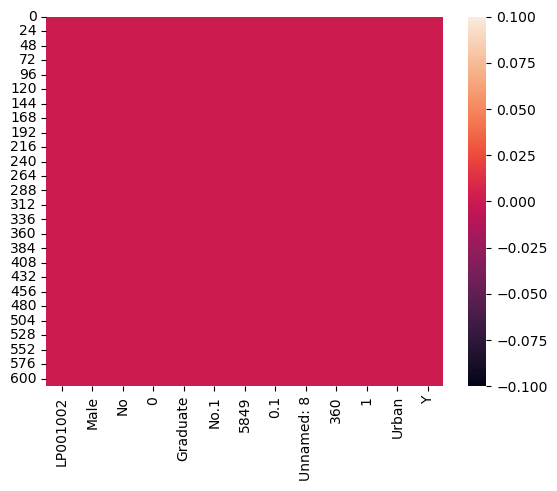

In [18]:
sns.heatmap(df.isnull())

In [19]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

LP001003    1
LP002332    1
LP002308    1
LP002314    1
LP002315    1
           ..
LP001693    1
LP001698    1
LP001699    1
LP001702    1
LP002990    1
Name: LP001002, Length: 613, dtype: int64


Male      501
Female    112
Name: Male, dtype: int64


Yes    401
No     212
Name: No, dtype: int64


0     359
1     102
2     101
3+     51
Name: 0, dtype: int64


Graduate        479
Not Graduate    134
Name: Graduate, dtype: int64


No     531
Yes     82
Name: No.1, dtype: int64


2500    9
4583    6
2600    6
6000    6
5000    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: 5849, Length: 504, dtype: int64


0.0       272
2500.0      5
2083.0      5
1666.0      5
1459.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: 0.1, Length: 287, dtype: int64


146.412162    21
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253

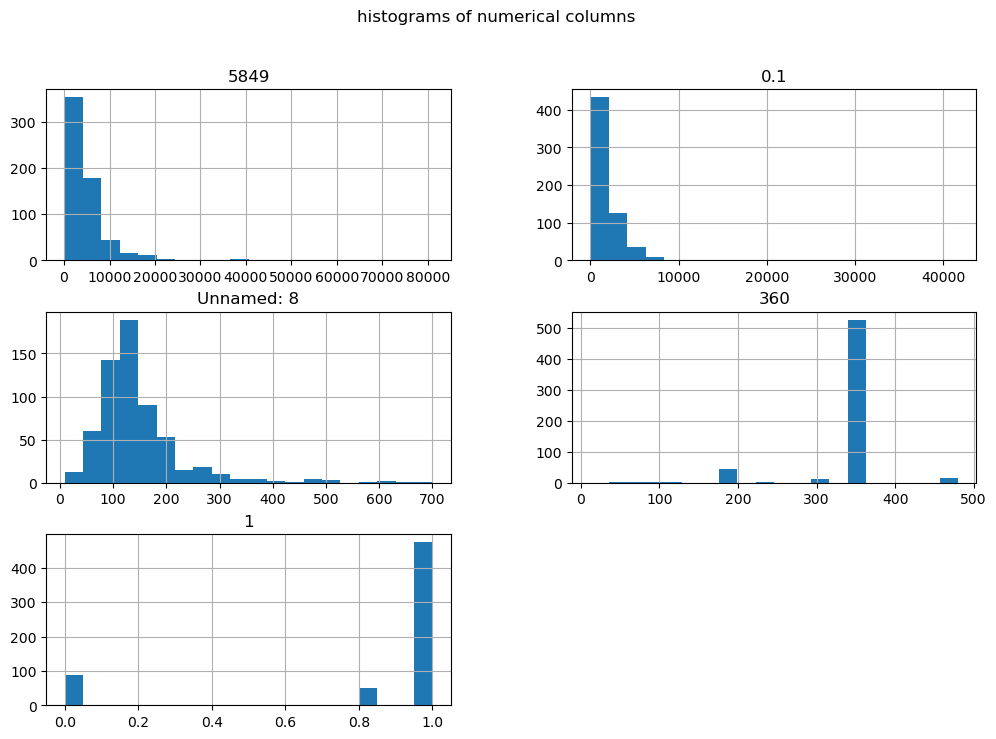

In [20]:
df[numerical_cols].hist(bins=20,figsize=(12,8))
plt.suptitle('histograms of numerical columns')
plt.show()

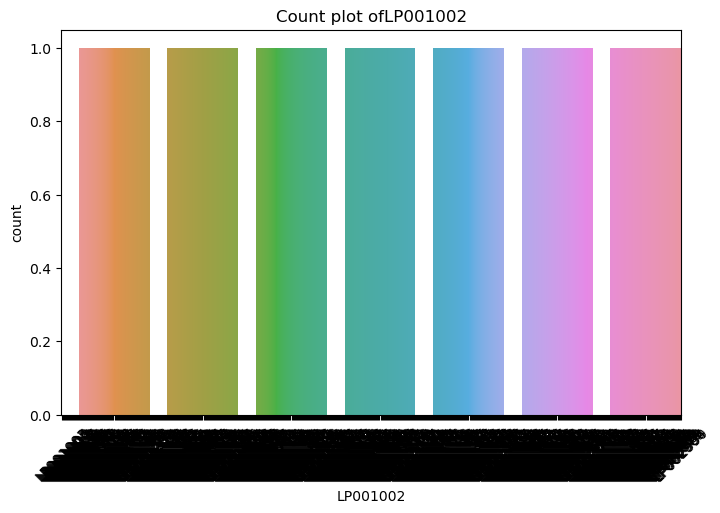

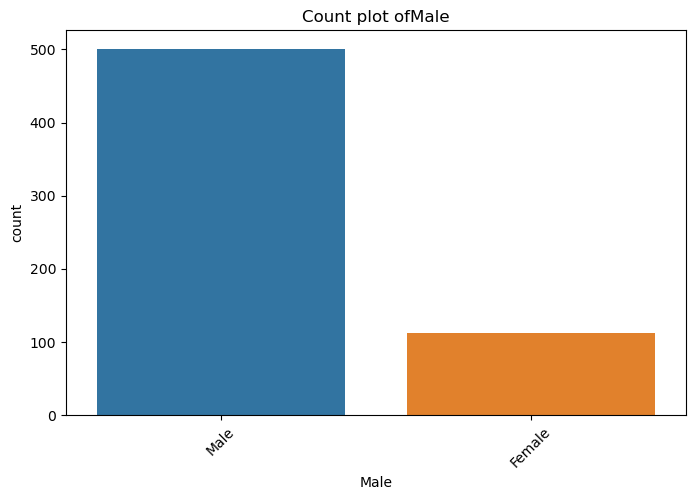

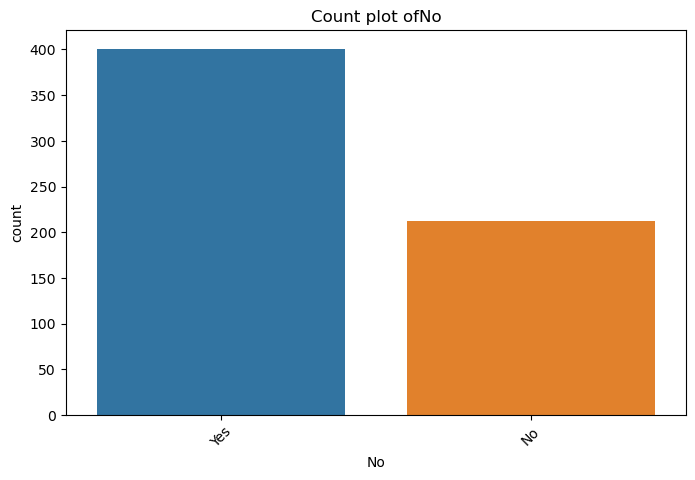

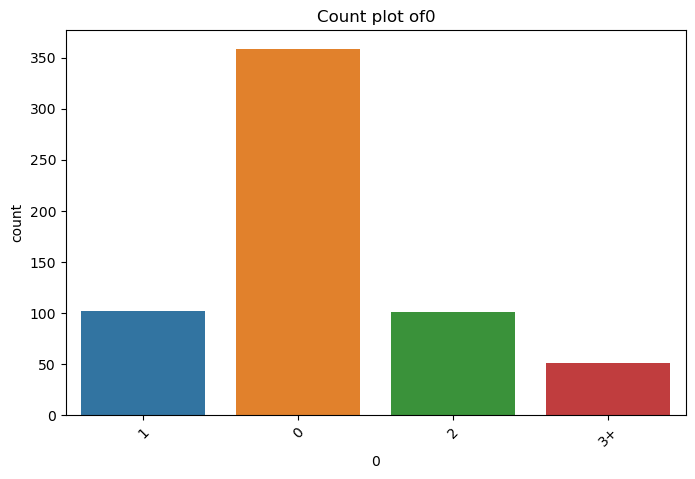

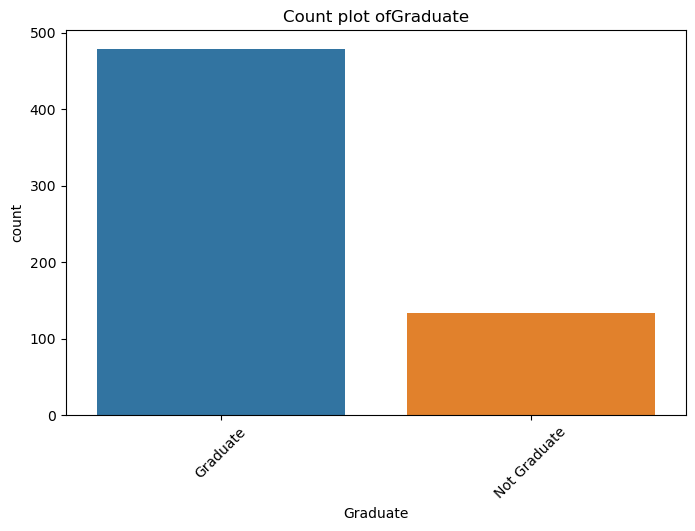

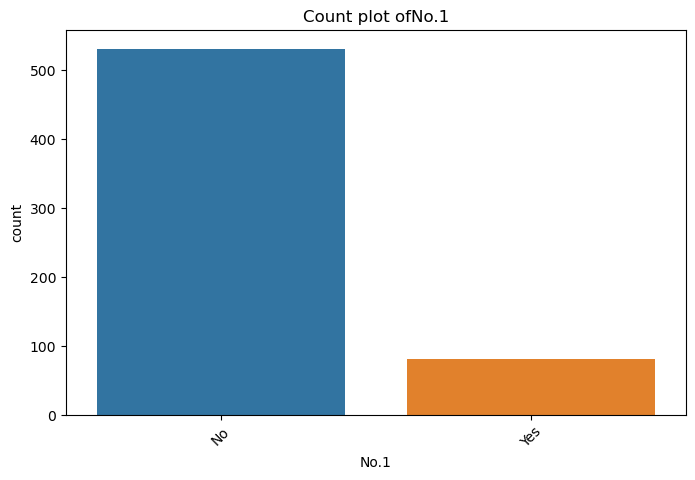

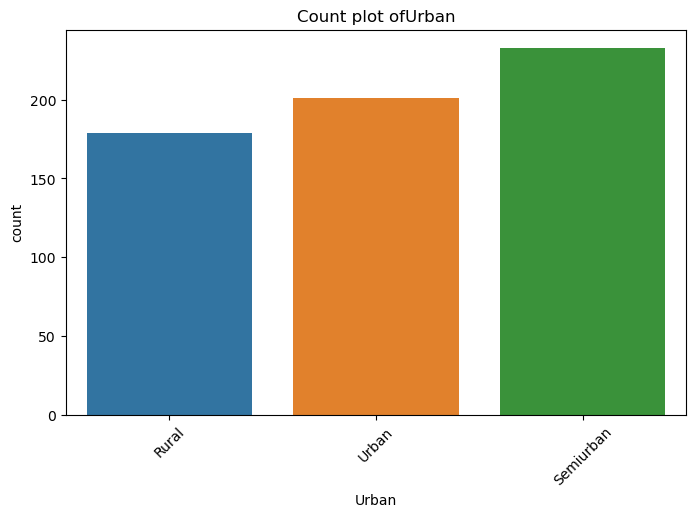

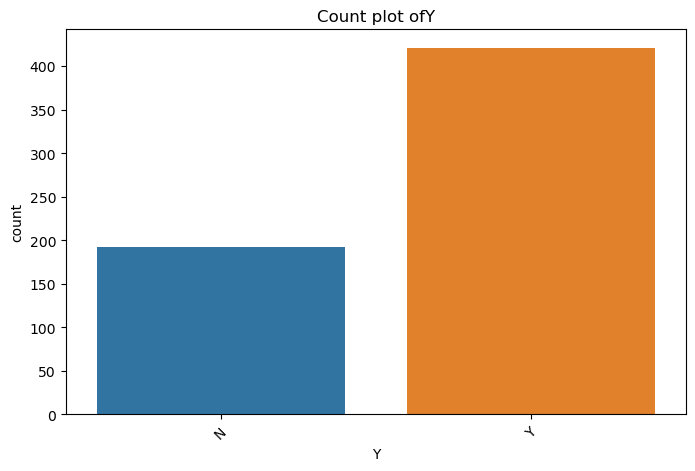

In [21]:
for col in categorical_col:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col,data=df)
    plt.title(f'Count plot of{col}')
    plt.xticks(rotation=45)
    plt.show()

# Data Preprocessing and Feature Engineering

In [22]:
df= pd.get_dummies(df, columns=categorical_col, drop_first=True)
print("Shape after one-hot encoding:", df.shape)

Shape after one-hot encoding: (613, 627)


In [23]:
scaler = StandardScaler()
df= df.copy()  
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [24]:
df['TotalIncome'] = df['5849'] + df['0.1']  
df['LoanAmount/Income'] = df['1'] / df['360']

In [25]:
df= pd.get_dummies(df, drop_first=True)

In [26]:
df['TotalIncome'] = df['5849'] + df['0.1']

In [27]:
x = df.drop('Y_Y', axis=1)
y = df['Y_Y']

# Model Building

We will buildnand evaluate multiple models on the dateset, including Logistic Regression and Rnadom Forest Classifier. We use performance metrics such as accuracy precision recall and F1-score to evaluate the models and compared their performance. 

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Model evaluation 

In [30]:
logistic_model=LogisticRegression(random_state=42)
logistic_model.fit(x_train,y_train)
y_pred_logistic=logistic_model.predict(x_test)
accuracy_logistic=accuracy_score(y_test,y_pred_logistic)
print("accuracy of logistic regression:", accuracy_logistic)

accuracy of logistic regression: 0.3008130081300813


In [31]:
rf_model= RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest:", accuracy_rf)

print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Accuracy of Random Forest: 0.8130081300813008
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.41      0.57        37
           1       0.79      0.99      0.88        86

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.72       123
weighted avg       0.84      0.81      0.79       123

Confusion Matrix for Random Forest:
[[15 22]
 [ 1 85]]


In [32]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model_tuned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(x_test)


accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print("Accuracy of Tuned Random Forest:", accuracy_rf_tuned)

print("Classification Report for Tuned Random Forest:")
print(classification_report(y_test, y_pred_rf_tuned))

print("Confusion Matrix for Tuned Random Forest:")
print(confusion_matrix(y_test, y_pred_rf_tuned))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy of Tuned Random Forest: 0.8130081300813008
Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.41      0.57        37
           1       0.79      0.99      0.88        86

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.72       123
weighted avg       0.84      0.81      0.79       123

Confusion Matrix for Tuned Random Forest:
[[15 22]
 [ 1 85]]


we evaluated the performance of ech model using cross-validation and identified the best perforing model based on the evaluation metrics. The Random Forest model showed heighest accuracy and was selected as the final model

# Saving the model(conclusion)

In [33]:
import joblib

In [34]:
joblib.dump(best_rf_model, 'random_forest_loan_model.joblib')

['random_forest_loan_model.joblib']

In [36]:
loaded_rf_model = joblib.load('random_forest_loan_model.joblib')
result=loaded_rf_model.score(x_test,y_test)
print(result*100)

81.30081300813008


In conclusion, we succesfully built and evaluated machine learninf models for predicting loan application status. The selected Random Forest model can be in production to assist financial institution in making decisiions about loan approvals